# Análise Exploratória de Documentos do Processo Licitatório

O intuito desse notebook é realizar uma análise exploratória sobre os documentos encaminhados pelo município na documentação jurídica do Processo Licitatório.

Os documentos são encaminhados pelos técnicos municipais para os processos licitatórios disponíveis, sendo os documentos validados pelo PARANACIDADE. A validação é feita em duas etapas deferimento, que representa a entrega dos documentos, e análise que representa a validação qualitativa dos documentos.

É esperado que o município faça o envio da documentação técnica e jurídica. Ao final da validação (fase de análise) os analistas da documentação jurídica do PARANACIDADE podem adicionar o parecer jurídico para os lotes (pode haver um parecer para vários lotes).

Nessa análise é feita a exploração da **Documentação Jurídica**. Os documentos dos processos concluídos foram baixados, descompactados, convertidos para imagem e tiveram o texto extraído através de um OCR. Será feita **apenas a análise textual**.

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('../../')

import pandas as pd
import numpy as np
import nltk
from sklearn import preprocessing
import matplotlib.pyplot as plt

from text.process import text_processor

import csv

csv.field_size_limit(sys.maxsize)


131072

In [58]:
!ls /home/cti/workspace/cls_documento/dataset/dataframe/raw

# !tail -n 150 /home/cti/workspace/cls_documento/dataset/dataframe/raw/2020-09-04_raw_dataframe.csv

# !tail -n 150 /home/cti/workspace/cls_documento/dataset/dataframe/raw/2020-09-04_raw_dataframe.csv | wc -l

# !sed -i 4989d /home/cti/workspace/cls_documento/dataset/dataframe/raw/2020-09-04_raw_dataframe.csv

# !sed -n 4989p /home/cti/workspace/cls_documento/dataset/dataframe/raw/2020-09-04_raw_dataframe.csv

# !head -n 50 /home/cti/workspace/cls_documento/dataset/dataframe/raw/2020-09-04_raw_dataframe.csv | tail -n 50

2020-09-04_raw_dataframe.csv


In [5]:
# DATAFRAME_PATH = '/home/cti/workspace/cls_documento/dataset/dataframe/dataframe_operacao_credito.csv'
# DATAFRAME_PATH = '/home/cti/workspace/cls_documento/dataset/dataframe/raw/2020-09-04_raw_dataframe.csv'
# DATAFRAME_PATH = '../../dataset/dataframe/processed/2020-10-02_dataframe_processado.csv'
DATAFRAME_PATH = '../../dataset/dataframe/processed/2020-09-10_dataframe_treino.csv'



df = pd.read_csv(DATAFRAME_PATH)

df['texto'] = df['texto'].astype(str).apply(lambda x: x.replace("\n", " "))
df['texto_limpo'] = df['texto'].astype(str).apply(text_processor.clear_words)
df['texto_len'] = df['texto'].astype(str).apply(len)
df['texto_limpo_len'] = df['texto_limpo'].astype(str).apply(len)
df['qtd_palavras_texto'] = df['texto'].apply(lambda x: len(str(x).split()))
df['qtd_palavras_texto_limpo'] = df['texto_limpo'].apply(lambda x: len(str(x).split()))

df.sample(5)

FileNotFoundError: [Errno 2] File ../../dataset/dataframe/processed/2020-09-10_dataframe_treino does not exist: &#39;../../dataset/dataframe/processed/2020-09-10_dataframe_treino&#39;

In [4]:
df_filtered = df[df['modulo'] == 'processo_licitatorio_juridico']

df_filtered.head()
# df_filtered.to_csv('../../dataset/dataframe/processed/dataframe_processado.csv', index=False)

Empty DataFrame
Columns: [projeto, texto, tipo, modulo, texto_limpo, texto_len, texto_limpo_len, qtd_palavras_texto, qtd_palavras_texto_limpo]
Index: []

In [62]:
len(df.index)

2866

In [3]:
df.sample().texto.values[0][:500] #500 caracteres de um texto

&#39;Para aumentar o tamanho a janeia, cique no botão Maximizar do navegador Es lmprimir x     Estado do Paraná PARANÁ 1) Secretaria de Estado da Fazenda  TOVERNO DO ESTADO Diretoria do Tesouro do Estado - DTE     Certidão Negativa para Obtenção de novas operações de crédito Nº 00048230  Dados do Município: Prefeitura Municipal de Bom Sucesso do Sul Endereço: Padre Ivo Antonio Zolet, 787  Município: Bom Sucesso do Sul - CNPJ nº: 80.874.100/0001-86 Estado: PR  Em atendimento 20 disposto no art. 51, pa&#39;

In [4]:
df.iloc[10].texto[:500] #500 chars de um texto

&#39;MUNICÍPIO DE JACAREZINHO Estado do Paraná  Rua Cel. Batista, 335 Centro - Fone: (043) 3911-3005 — CEP: 86400-000 CNPJ: 76.966.860/0001-46        Ofício nº 009/2020 SMF-DT  Jacarezinho, 21 de maio de 2020.  Ilmo Sr.  WELLINGTON DALMAZ  Diretor de Operações do Setor Público FOMENTO PARANÁ  Assunto: INDICAÇÃO DE CONTA DE DÉBITO  Prezado Senhor,  Esta Prefeitura do Município de Jacarezinho, por seu representante legal infra- assinado, informa o número da conta corrente para débito de parcelas de tod&#39;

In [7]:
df.iloc[10].texto_limpo[:500] #500 chars de um texto

'natureza jurídica encontrada página prefeitura municipal almirante tamandare data aorta lei orçamentária anual 2020 demonstrativo receita despesa segundo categorias econômicas anexo lei 320/64 recetas velor despesas valor recoizs gorertes 7220 499040 despesas correntes 189 790 25568 impostos taxas contribuições mehoria 3492420975 pessoal encargos sociais 970 785 continuições a823707a juros encargos divida 2771987 receita pattimonial 2207112180 despesas correntes aromas transferência corrertos 15'

## Quantidade de documentos por processo

Os documentos solicitados ao município possuem um tipo específico, pré-determinado pelo sistema, cabendo ao analista verificar se está condizente com o esperado na fase de deferimento. Na fase de deferimento o os documentos solicitados para cada tipo, podendo o PARANACIDADE dispensar alguns documentos de serem apresentados, conforme o caso.

In [5]:
df.groupby('projeto').count() #qtd de documentos por projeto

texto  tipo  modulo  \
projeto                                                             
Almirante Tamandaré - Operação de Crédito 17      7     7       7   
Almirante Tamandaré - Operação de Crédito 18      7     7       7   
Almirante Tamandaré - Operação de Crédito 19      7     7       7   
Altamira do Paraná - Operação de Crédito 14      10    10      10   
Ampére - Operação de Crédito 12                  11    11      11   
...                                             ...   ...     ...   
Tamarana - Operação de Crédito 8                  8     8       8   
Terra Rica - Operação de Crédito 25              11    11      11   
Terra Rica - Operação de Crédito 26               5     5       5   
Terra Roxa - Operação de Crédito 21              10    10      10   
Tupãssi - Operação de Crédito 16                 10    10      10   

                                              texto_limpo  texto_len  \
projeto                                                                
Almirante Tamandaré - Operação de Crédito 17            7          7   
Almirante Tamandaré - Operação de Crédito 18            7          7   
Almirante Tamandaré - Operação de Crédito 19            7          7   
Altamira do Paraná - Operação de Crédito 14            10         10   
Ampére - Operação de Crédito 12                        11         11   
...                                                   ...        ...   
Tamarana - Operação de Crédito 8                        8          8   
Terra Rica - Operação de Crédito 25                    11         11   
Terra Rica - Operação de Crédito 26                     5          5   
Terra Roxa - Operação de Crédito 21                    10         10   
Tupãssi - Operação de Crédito 16                       10         10   

                                              texto_limpo_len  \
projeto                                                         
Almirante Tamandaré - Operação de Crédito 17                7   
Almirante Tamandaré - Operação de Crédito 18                7   
Almirante Tamandaré - Operação de Crédito 19                7   
Altamira do Paraná - Operação de Crédito 14                10   
Ampére - Operação de Crédito 12                            11   
...                                                       ...   
Tamarana - Operação de Crédito 8                            8   
Terra Rica - Operação de Crédito 25                        11   
Terra Rica - Operação de Crédito 26                         5   
Terra Roxa - Operação de Crédito 21                        10   
Tupãssi - Operação de Crédito 16                           10   

                                              qtd_palavras_texto  \
projeto                                                            
Almirante Tamandaré - Operação de Crédito 17                   7   
Almirante Tamandaré - Operação de Crédito 18                   7   
Almirante Tamandaré - Operação de Crédito 19                   7   
Altamira do Paraná - Operação de Crédito 14                   10   
Ampére - Operação de Crédito 12                               11   
...                                                          ...   
Tamarana - Operação de Crédito 8                               8   
Terra Rica - Operação de Crédito 25                           11   
Terra Rica - Operação de Crédito 26                            5   
Terra Roxa - Operação de Crédito 21                           10   
Tupãssi - Operação de Crédito 16                              10   

                                              qtd_palavras_texto_limpo  
projeto                                                                 
Almirante Tamandaré - Operação de Crédito 17                         7  
Almirante Tamandaré - Operação de Crédito 18                         7  
Almirante Tamandaré - Operação de Crédito 19                         7  
Altamira do Paraná - Operação de Crédito 14                         10  
Ampére - Operação de Crédito 12           

&lt;AxesSubplot:xlabel=&#39;projeto&#39;&gt;

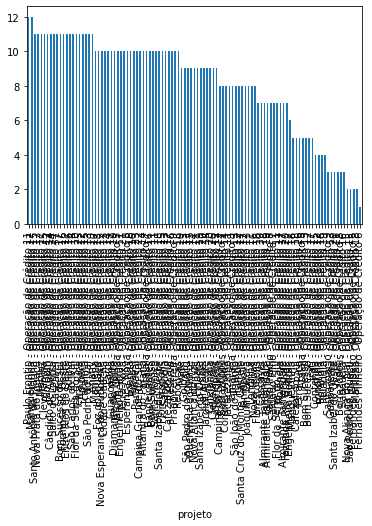

In [6]:
df.groupby('projeto').count()['tipo'].sort_values(ascending=False).plot(kind='bar')

## Quantidade de documentos por tipo

&lt;AxesSubplot:&gt;

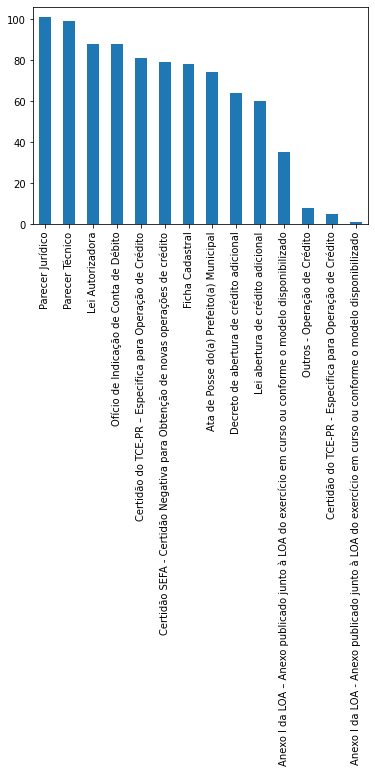

In [7]:
df['tipo'].value_counts().sort_values(ascending=False).plot(kind='bar')

## Quantidade de palavras por documento

In [13]:
tipos = df.tipo.unique()

for tipo in tipos:
    print(tipo)

Certidão SEFA - Certidão Negativa para Obtenção de novas operações de crédito
Certidão do TCE-PR – Especifica para Operação de Crédito
Lei Autorizadora
Parecer Técnico
Parecer Jurídico
Decreto de abertura de crédito adicional
Ata de Posse do(a) Prefeito(a) Municipal
Ofício de Indicação de Conta de Débito
Ficha Cadastral
Lei abertura de crédito adicional
Anexo I da LOA – Anexo publicado junto à LOA do exercício em curso ou conforme o modelo disponibilizado
Outros - Operação de Crédito
Certidão do TCE-PR - Especifica para Operação de Crédito


&lt;AxesSubplot:&gt;

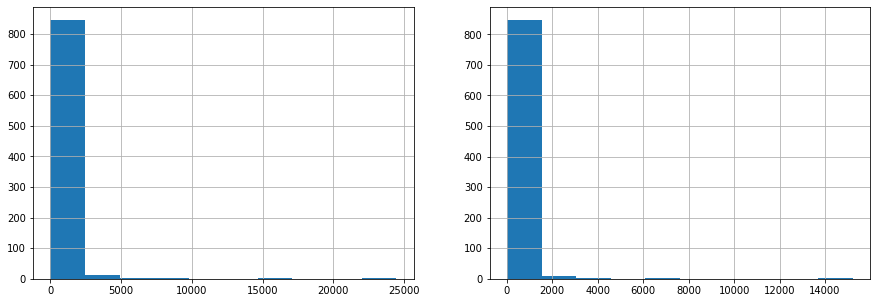

In [8]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

df['qtd_palavras_texto'].hist(ax=axes[0])
df['qtd_palavras_texto_limpo'].hist(ax=axes[1])

array([&lt;AxesSubplot:title={&#39;center&#39;:&#39;0&#39;}&gt;], dtype=object)

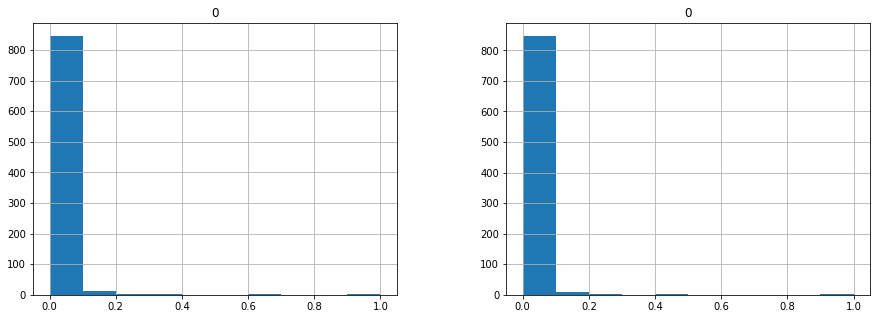

In [9]:
# Valores normalizados
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

x = df[['qtd_palavras_texto']].values.astype(float)
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)

df_normalized = pd.DataFrame(x_scaled)

df_normalized.hist(ax=axes[0])

x = df[['qtd_palavras_texto_limpo']].values.astype(float)
# min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)

df_normalized = pd.DataFrame(x_scaled)

df_normalized.hist(ax=axes[1])


&lt;AxesSubplot:xlabel=&#39;tipo&#39;&gt;

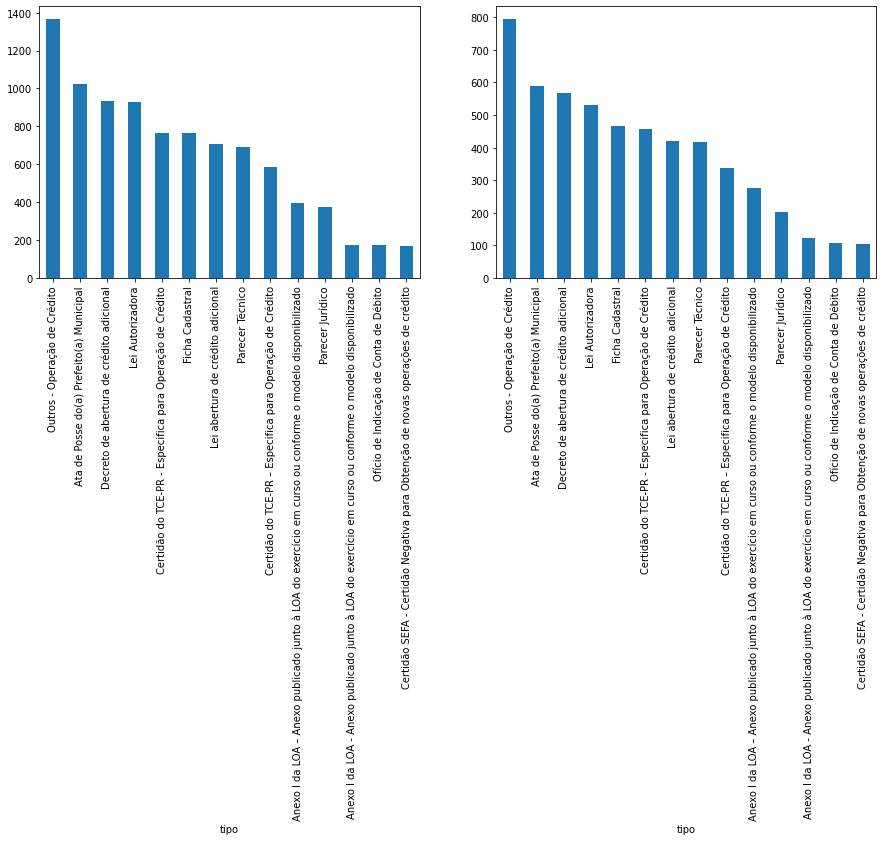

In [10]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

# Média de palavras por tipo de documento
df.groupby('tipo')['qtd_palavras_texto'].mean().sort_values(ascending=False).plot(kind='bar', ax=axes[0])
df.groupby('tipo')['qtd_palavras_texto_limpo'].mean().sort_values(ascending=False).plot(kind='bar', ax=axes[1])

## Tamanho dos textos por tipo de documento

In [14]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

df['texto_len'].hist(ax=axes[0])
df['texto_limpo_len'].hist(ax=axes[1])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f63357a0990>],
      dtype=object)

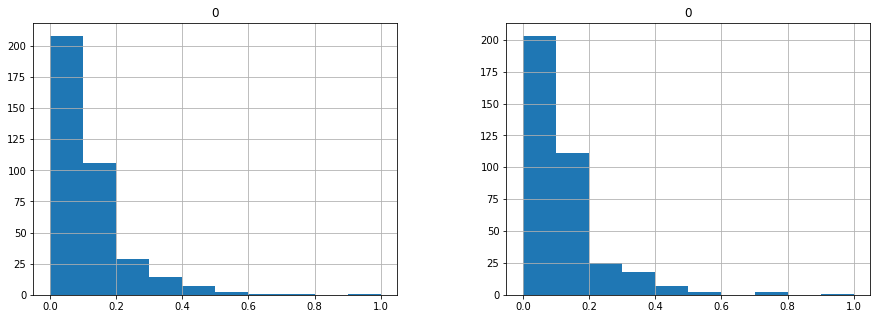

In [15]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

# Valores normalizados
x = df[['texto_len']].values.astype(float)
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_normalized = pd.DataFrame(x_scaled)
df_normalized.hist(ax=axes[0])


x = df[['texto_limpo_len']].values.astype(float)
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_normalized = pd.DataFrame(x_scaled)
df_normalized.hist(ax=axes[1])

## N-grams

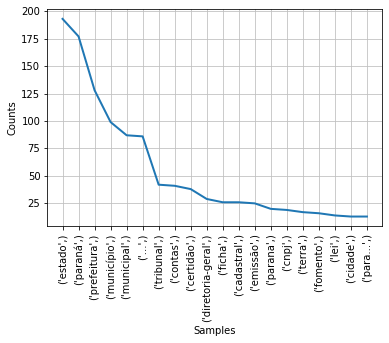

In [16]:
#uni-gram
text = df.texto.to_string().split()
ngs = nltk.ngrams(text, 1)
fdist = nltk.FreqDist(ngs)
fdist.plot(20)


#uni-gram texto sem stopwords
text = df.texto_limpo.to_string().split()
ngs = nltk.ngrams(text, 1)
fdist_limpo = nltk.FreqDist(ngs)
fdist_limpo.plot(20)

In [18]:
#bi-gram
text = df.texto.to_string().split()
ngs = nltk.ngrams(text, 2)
fdist = nltk.FreqDist(ngs)
fdist.plot(20)


#bi-gram texto sem stopwords
text = df.texto_limpo.to_string().split()
ngs = nltk.ngrams(text, 2)
fdist_limpo = nltk.FreqDist(ngs)
fdist_limpo.plot(20)

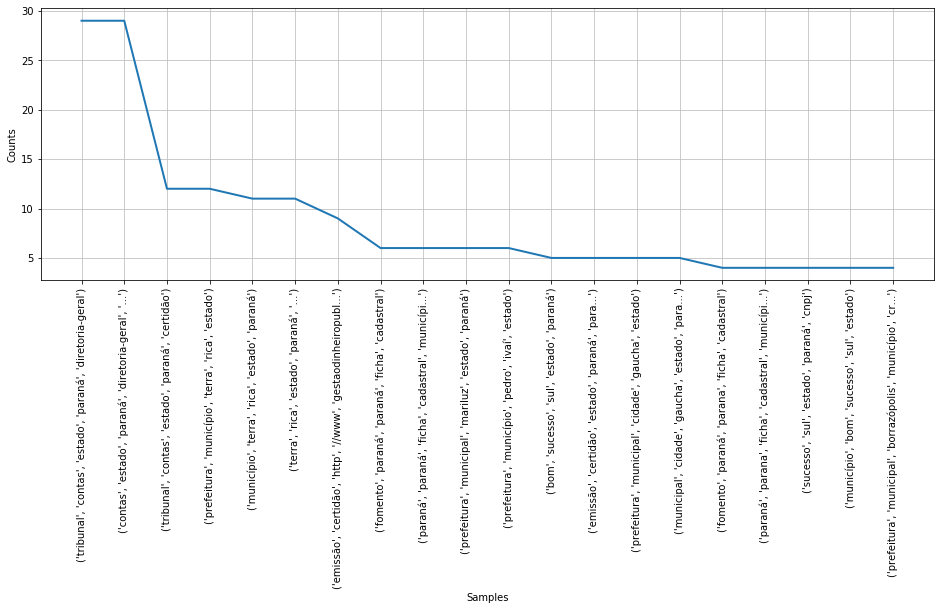

In [19]:

# 5-gram
text = df.texto.to_string().split()

ngs = nltk.ngrams(text, 5)

fdist = nltk.FreqDist(ngs)
plt.figure(figsize=(16,5))

fdist.plot(20)


text = df.texto_limpo.to_string().split()

ngs = nltk.ngrams(text, 5)

fdist = nltk.FreqDist(ngs)
plt.figure(figsize=(16,5))

fdist.plot(20)

In [ ]:



hashtags = user_extract(df[df['city'] == 'fln']['tweet'].astype(str).apply(lambda x : x.lower()))
sum_hashtags = sum(hashtags,[])

freq = nltk.FreqDist(sum_hashtags)
d = pd.DataFrame({'Usuários': list(freq.keys()),
                  'Count': list(freq.values())})

d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Usuários", y = "Count")
ax.set(ylabel = 'Total')
plt.show()



